In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

db = pd.read_csv('./campaign3.csv')
db.drop(['Campaign_ID'], axis=1, inplace=True)
db.head()

,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [94]:
# Convert Date column to datetime
db['Date'] = pd.to_datetime(db['Date'])

In [95]:
db['Target_Audience'].unique()

array(['Men 18-24', 'Women 35-44', 'Men 25-34', 'All Ages', 'Women 25-34'],
      dtype=object)

In [96]:
# Create new columns for 'Target_Male' and 'Target_Female'
db['Target_Male'] = db['Target_Audience'].apply(lambda x: 1 if 'Men' in x or x == 'All Ages' else 0)
db['Target_Female'] = db['Target_Audience'].apply(lambda x: 1 if 'Women' in x or x == 'All Ages' else 0)

# Create dummies for each age group
age_groups = ['18-24', '25-34', '35-44']
for age_group in age_groups:
    db[f'Target_Age_{age_group}'] = db['Target_Audience'].apply(lambda x: 1 if age_group in x or x == 'All Ages' else 0)

# Drop the original 'Target_Audience' column
db.drop(['Target_Audience'], axis=1, inplace=True)

db.head()

,Company,Campaign_Type,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Target_Male,Target_Female,Target_Age_18-24,Target_Age_25-34,Target_Age_35-44
0,Innovate Industries,Email,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,1,0,1,0,0
1,NexGen Systems,Email,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,0,1,0,0,1
2,Alpha Innovations,Influencer,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,1,0,0,1,0
3,DataTech Solutions,Display,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,1,1,1,1,1
4,NexGen Systems,Email,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,1,0,0,1,0


In [97]:
db['Acquisition_Cost'] = db['Acquisition_Cost'].str.replace('$', '').str.replace(',', '').astype(float)

In [ ]:
# Converting the columns into integers
db['Duration'] = db['Duration'].apply(lambda x: int(x.split(' ')[0]))

# rename duration to duration_days
db.rename(columns={'Duration': 'Duration_Days'}, inplace=True)

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Company           200000 non-null  object        
 1   Campaign_Type     200000 non-null  object        
 2   Duration_Days     200000 non-null  int64         
 3   Channel_Used      200000 non-null  object        
 4   Conversion_Rate   200000 non-null  float64       
 5   Acquisition_Cost  200000 non-null  float64       
 6   ROI               200000 non-null  float64       
 7   Location          200000 non-null  object        
 8   Language          200000 non-null  object        
 9   Clicks            200000 non-null  int64         
 10  Impressions       200000 non-null  int64         
 11  Engagement_Score  200000 non-null  int64         
 12  Customer_Segment  200000 non-null  object        
 13  Date              200000 non-null  datetime64[ns]
 14  Targ

In [99]:
# Checking values of Language
db['Language'].value_counts()

Language
Mandarin    40255
Spanish     40102
German      39983
English     39896
French      39764
Name: count, dtype: int64

In [100]:
# Checking values of Company column
db['Company'].value_counts()

Company
TechCorp               40237
Alpha Innovations      40051
DataTech Solutions     40012
NexGen Systems         39991
Innovate Industries    39709
Name: count, dtype: int64

In [101]:
# Create dummies for columns, not useful for now 
#db = pd.get_dummies(db, columns=['Channel_Used', 'Language', 'Company', 'Campaign_Type'], drop_first=False)

In [102]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Company           200000 non-null  object        
 1   Campaign_Type     200000 non-null  object        
 2   Duration_Days     200000 non-null  int64         
 3   Channel_Used      200000 non-null  object        
 4   Conversion_Rate   200000 non-null  float64       
 5   Acquisition_Cost  200000 non-null  float64       
 6   ROI               200000 non-null  float64       
 7   Location          200000 non-null  object        
 8   Language          200000 non-null  object        
 9   Clicks            200000 non-null  int64         
 10  Impressions       200000 non-null  int64         
 11  Engagement_Score  200000 non-null  int64         
 12  Customer_Segment  200000 non-null  object        
 13  Date              200000 non-null  datetime64[ns]
 14  Targ

In [103]:
# Keep only the columns 'Clicks', 'Impressions', and 'Acquisition_Cost' in db_timeseries
db_timeseries = db[['Clicks', 'Impressions', 'Acquisition_Cost', 'Date']]
db_timeseries.set_index('Date', inplace=True)
db_timeseries.sort_index(inplace=True)

# Display the first few rows of the modified DataFrame
db_timeseries.head()

/var/folders/mw/2cx6x93d04g09y_zdvpb9vpc0000gn/T/ipykernel_92707/2697065238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_timeseries.sort_index(inplace=True)


,Clicks,Impressions,Acquisition_Cost
Date,,,
2021-01-01,506,1922,16174.0
2021-01-01,256,4394,7382.0
2021-01-01,693,4559,15231.0
2021-01-01,178,6802,13034.0
2021-01-01,713,8842,7126.0


In [104]:
# Resampling the data to daily frequency
db_timeseries = db_timeseries.resample('D').sum()
db_timeseries.head()

,Clicks,Impressions,Acquisition_Cost
Date,,,
2021-01-01,287148,3027100,6898798.0
2021-01-02,300316,2999929,6989730.0
2021-01-03,302927,3108943,6954509.0
2021-01-04,293974,2896980,6827421.0
2021-01-05,309724,2912871,7094895.0


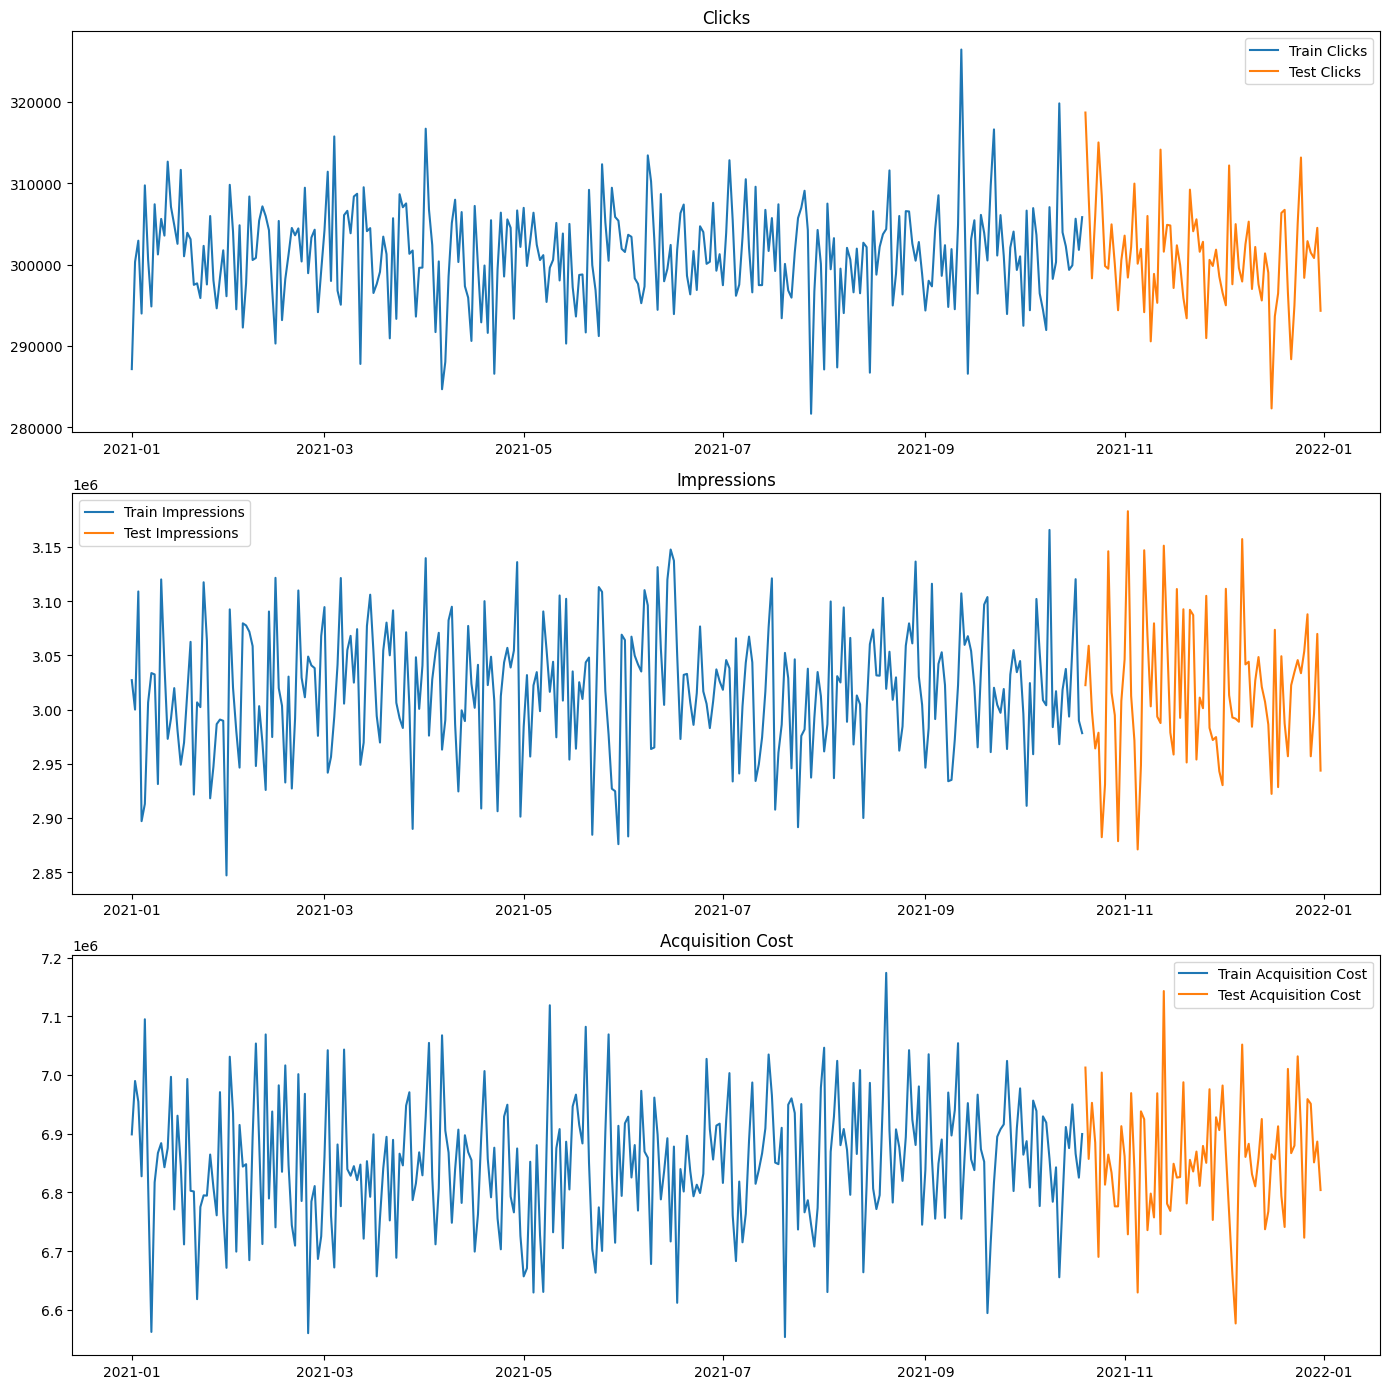

In [105]:
train_size = int(len(db_timeseries) * 0.8)
train, test = db_timeseries.iloc[:train_size], db_timeseries.iloc[train_size:]

# Plotting the data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 1, figsize=(14, 14))

ax[0].plot(train['Clicks'], label='Train Clicks')
ax[0].plot(test['Clicks'], label='Test Clicks')
ax[0].set_title('Clicks')
ax[0].legend()

ax[1].plot(train['Impressions'], label='Train Impressions')
ax[1].plot(test['Impressions'], label='Test Impressions')
ax[1].set_title('Impressions')
ax[1].legend()

ax[2].plot(train['Acquisition_Cost'], label='Train Acquisition Cost')
ax[2].plot(test['Acquisition_Cost'], label='Test Acquisition Cost')
ax[2].set_title('Acquisition Cost')
ax[2].legend()

plt.tight_layout()
plt.show()

In [106]:
# Function to fit AutoARIMA and evaluate performance
def fit_and_evaluate_arima(train, test, column):
    model = auto_arima(train[column], error_action='ignore', suppress_warnings=True)
    model.fit(train[column])
    
    forecast = model.predict(n_periods=len(test))
    test[f'{column}_Forecast'] = forecast
    
    mse = mean_squared_error(test[column], forecast)
    mae = mean_absolute_error(test[column], forecast)
    
    print(f'{column} - MSE: {mse}, MAE: {mae}')
    
    plt.figure(figsize=(10, 6))
    plt.plot(train[column], label='Train')
    plt.plot(test[column], label='Test')
    plt.plot(test[f'{column}_Forecast'], label='Forecast')
    plt.title(f'{column} - AutoARIMA Forecast')
    plt.legend()
    plt.show()

Clicks - MSE: 38125931.35936618, MAE: 4690.63862826046


/var/folders/mw/2cx6x93d04g09y_zdvpb9vpc0000gn/T/ipykernel_92707/3332614968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'{column}_Forecast'] = forecast


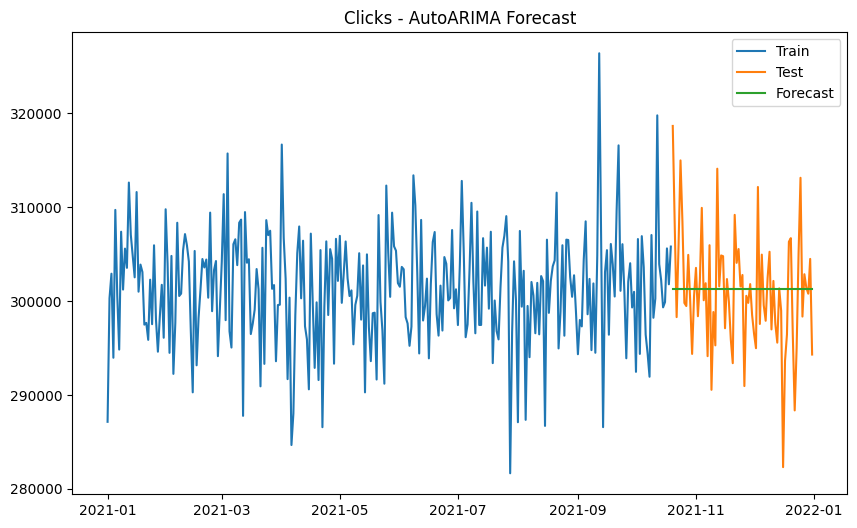

/var/folders/mw/2cx6x93d04g09y_zdvpb9vpc0000gn/T/ipykernel_92707/3332614968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'{column}_Forecast'] = forecast


Impressions - MSE: 4337659341.667534, MAE: 52552.49193094407


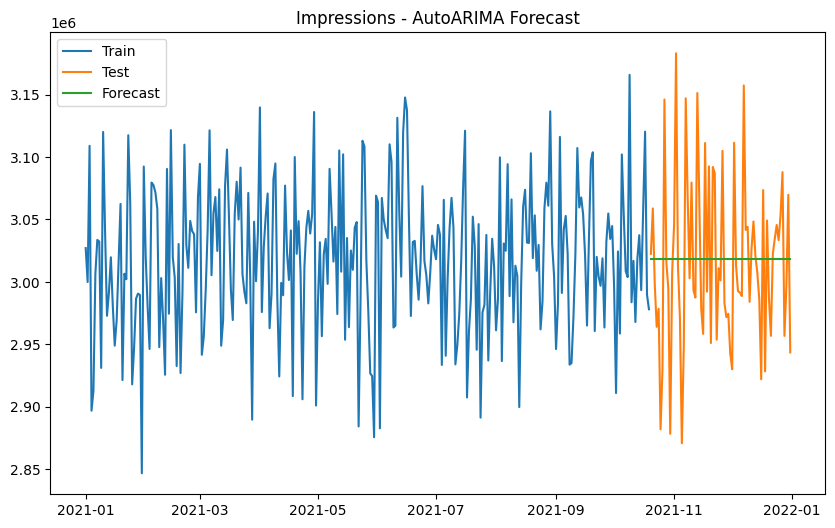

/var/folders/mw/2cx6x93d04g09y_zdvpb9vpc0000gn/T/ipykernel_92707/3332614968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'{column}_Forecast'] = forecast


Acquisition_Cost - MSE: 12115509978.136986, MAE: 88101.23287671233


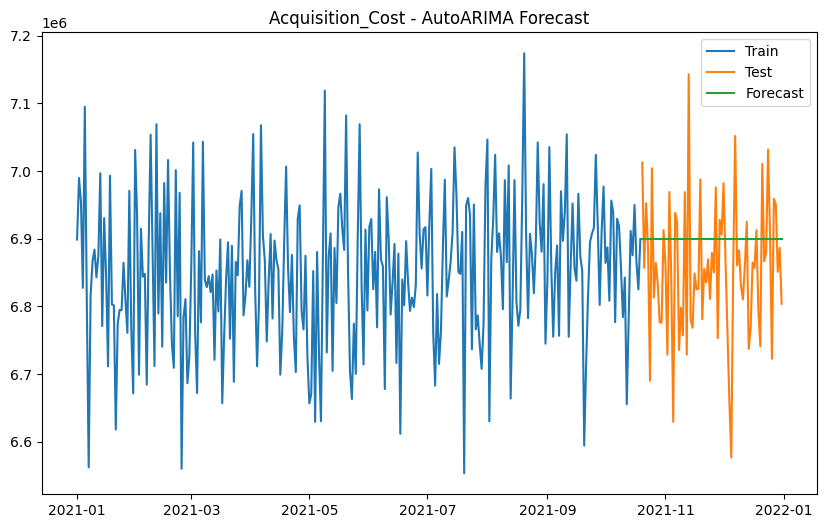

In [107]:
# Fit and evaluate AutoARIMA for each column
for column in ['Clicks', 'Impressions', 'Acquisition_Cost']:
    fit_and_evaluate_arima(train, test, column)

In [ ]:
# I believe the data is too noisy to be predicted by ARIMA model.